In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


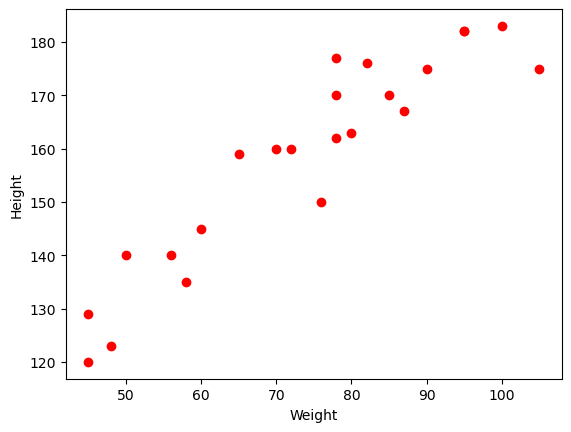

In [22]:
##scatter plot
plt.scatter(df['Weight'],df['Height'], color = 'red')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [23]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


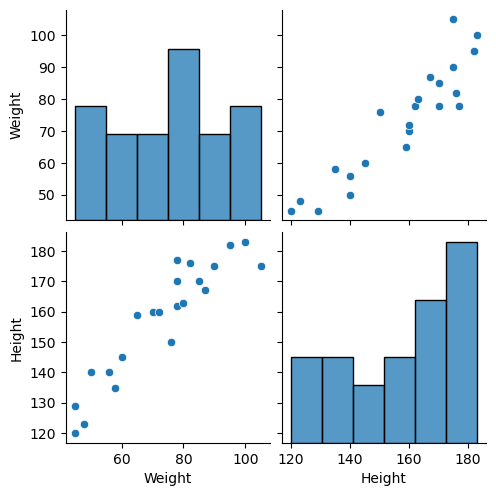

In [24]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [25]:
## Independent and dependent features
X=df[['Weight']] ### independent features should be dataframe or 2 dimesnional array
y=df['Height'] ## this variiable can be in series or 1d array

X.shape

(23, 1)

In [26]:
## Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

X_train.shape


(17, 1)

In [27]:
## Standardization
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [40]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

regression=LinearRegression(n_jobs=-1)  # n_jobs=-1 → uses all available CPU cores to speed up computation.

regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [30]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


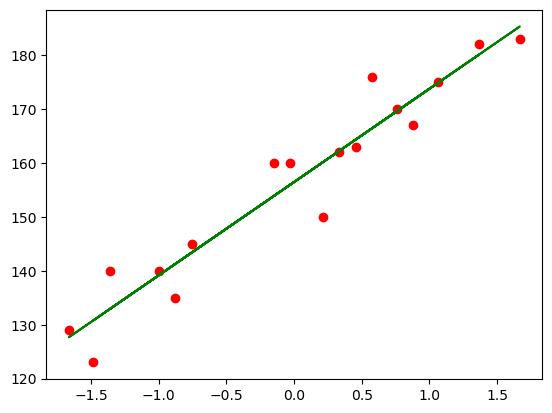

In [31]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train, c = 'r')
plt.plot(X_train,regression.predict(X_train), c = 'green')
plt.show()

### __`prediction of test data`__
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [32]:
## Prediction for test data
y_pred=regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [33]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

## __`Performance Metrics`__

In [34]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(" mean squared error : ", mse)
print(" mean absolute error : ", mae)
print(" root mean squared error : ", rmse)

 mean squared error :  114.84069295228699
 mean absolute error :  9.665125886795005
 root mean squared error :  10.716374991212605


## __`R square `__
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [35]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print("R2 Score :", score)
print(f"Accuracy is : {score*100:.2f}%")

R2 Score : 0.7360826717981276
Accuracy is : 73.61%


## __`Adjusted R2`__ 

__= 1 – [(1-R2)*(n-1)/(n-k-1)]__

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [36]:
#display adjusted R-squared
adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f"Adjusted R2 is: {adjusted_r2:.2f}")
print(f"Adjusted R2 is: {adjusted_r2*100:.2f}")


Adjusted R2 is: 0.67
Adjusted R2 is: 67.01


## __`OLS Linear Regression`__

In [37]:
## OLS Linear Regression

import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 27 Aug 2025   Prob (F-statistic):                       0.664
Time:                        18:47:55   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
